<span style="font-family: Arial; font-weight:bold;font-size:2em;color:green;"> Build a personalized, low impact and healthful diet 

*****************************************
#### People may have difficulty coming up with a diet that:
* meets their **nutrient** needs, 
* **minimizes disease** risk 
* reduces their diet related **environmental impacts**

<span style="font-family: Arial; font-size:1em;color:black;"> This tool was developed to help an individual build their own healthful, low environmental impact diet, and takes into account where, when, and how their food is produced, as well as their personal dietary needs.


-------------------------------------------------------

In [1]:
# HIDDEN
from IPython.display import HTML
import random
from ipywidgets import widgets, interact, Dropdown,SelectMultiple, Checkbox,VBox,FloatSlider,Button,IntProgress, Layout
from IPython.display import HTML, display, Image
from IPython import get_ipython
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mpld3
ipython = get_ipython()
#data_dir = os.path.join('..','nb1','Input')

In [2]:
# HIDDEN
#def hide_toggle(for_next=False):
def hide_toggle(text,for_next=False):    
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    #toggle_text = 'Code'  # text shown on toggle link
    toggle_text = text
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [3]:
# HIDDEN
#########################################################
style = {'description_width': 'initial'}
listofcheckboxes = {'no food preferences':[0],'fruits':['FAT'],'vegetables':['DGR','DGC'],
     'legumes or beans':['DBR','DBC','DFR','DFC'],'grains and starches':['AC','AC_wg','DAR','DAC',
     'AI','AI_wg','AA','AA_wg','AF','AF_wg','AD','AD_wg'],'nuts and seeds':
     ['GAT'],'dairy products':['BAE','BAH','BAK','BLS','BLM','BLH','BLF','BN','BJC'],
     'vegetarian/vegan food items':['BAV','BNV','VEG'],
     'fish':['JAC', 'JAR', 'JCC', 'JCR', 'JKC', 'JKR', 'JMC', 'JMR', 'JRC'],
    'meat':['MBGR','MBGC','MACR','MACC','MAER','MECC','MECR','MEER','MEEC','MAIC','MAIR','MAE',\
    'MAIR','MAIC','MCOR','MCOC','MCAR','MCAC','MAGR','MAGC','MAHR','MAHC',
    'MI','MAAC','MAAR'],'eggs, oils, and others':['CA','OA', 'OC', 'OE','BTM','BH','BP','BPV','PAC','SC','SEA','WCN']}

In [4]:
# HIDDEN
## WIDGETS   
search_widget = widgets.Dropdown(options = listofcheckboxes.keys(),layout={'width': 'initial'})
experiments = {}
experiments_mass = {}
#options_widget = widgets.VBox(layout={'overflow': 'auto'})
options_widget = widgets.VBox(layout={'width': 'auto'})
mass_widget = widgets.VBox(layout={'overflow': 'auto'})
button_wid = widgets.Button(description='Save Choices')
button_wid.style.button_color = 'lightgreen'
but_out = widgets.Output()
runcodeprint = widgets.Button(description='Show Must Haves')
runcodeprint.style=button_wid.style
outputprint = widgets.Output()
multi_select = widgets.HBox([search_widget, options_widget,mass_widget,button_wid])

In [11]:
# HIDDEN
def joinlists_new(widgetname):
    global selectedfoods
    #mydict = dict(zip(df_foods['Food Item'],df_foods['Food Name']))
    mydict = dict(zip(df_foods['FoodItem_2'],df_foods['Food Name']))
    #rs1 = [widgetname.description for widgetname in widgetname.children[1].children if widgetname.value]
    rs1 = [mydict[multi_select.description] for multi_select in multi_select.children[1].children if multi_select.value]
    rs2 = [widgetname.value for widgetname in widgetname.children[2].children if widgetname.value]
    food = list(zip(rs1,rs2))  
    try:
        food
        for j in food:
            te = [j[0].replace('_',' ')]
            tee = [i[:-4] for i in te]
            selectedfoods[tee[0]] = {}
            selectedfoods[tee[0]]['names']=j[0]
            selectedfoods[tee[0]]['mass']=j[1]              
    except NameError:
        pass   
    return #selectedfoods
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

def test(b):
    global df_foods
    with output2:
        print ('I want a diet for:',var1.value, '\nfor the month of:',mnths[var2.value])
        ipython.magic('run Build_Optimization_Database.ipynb')
        dftest2 = calc_impacts(cntry[var1.value],var2.value)
        ipython.magic('run Foods_to_Include.ipynb')
        df_foods = editdf(dftest2,imp.value,diettype.value,supp[sup.value])
        print ('Database has been built. Please continue.')
        return df_foods

# HIDDEN
selectedfoods = {}
#Generate a dummy list
#Allfileslist = list(zip(df_foods['Food Name'],df_foods['Group']))
#Search box + generate ALL the checkboxes, this seems to be the bottleneck

def save(b):
    with but_out:
        joinlists_new(multi_select)
button_wid.on_click(save)
#test=[]
def whentextischanged (change):
    """Dynamically update the widget experiments"""       
    Allfileslist = list(zip(df_foods['Food Name'],df_foods['Group'],df_foods['FoodItem_2']))
    close_matches = [x[0] for x in Allfileslist if x[1] in(listofcheckboxes[search_widget.value])]
    display = [x[2] for x in Allfileslist if x[1] in(listofcheckboxes[search_widget.value])]
    
    
    for name,dis in zip(close_matches,display):
        if name not in experiments:              
            experiments[name] = widgets.Checkbox(description=dis,value=False,\
                                                 layout={'width':'max-content'},
                                                 style={'description_width': 'initial'})
                #print (change2)
            
            experiments_mass[name] = widgets.IntSlider(description='grams', min=0,max=400,step=50,value=0)  
        
    new_options = [experiments[eachfilename] for eachfilename in close_matches]
    new_options_mass = [experiments_mass[eachfilename] for eachfilename in close_matches]
    
    options_widget.children = new_options   
    mass_widget.children = new_options_mass    
    

def printfoods(b):
    global selectedfoods
    with outputprint:
        foodsitems = [k for k,v in selectedfoods.items()]
        foodmass = [v['mass'] for k,v in selectedfoods.items()]
        #print (selectedfoods)
        for i,j in zip(foodsitems,foodmass):
            print (i,':',j,'grams') 
            
def run_tool(b):
    global df_opt
    global status
    with output5:       
        ipython.magic('run Diet_Optimization_Tool.ipynb')
        print ('This can take some time.')
        relaxfactor = 2 # this sets the maximum food limits to be one serving size for each food item
        count = 0        
        df_opt=runopt(df_foods,imp.value,diettype.value,supp[sup.value],gender[gen.value],personweight.value,\
                          height.value,age.value,act.value,days.value,relaxfactor,selectedfoods,vitd[vitamind.value])    
        while ((count<=3)&(status!=1)):
            if status==1:
                print ('Your optimized diet is shown below')
                break
            else:
                relaxfactor +=1 # this increases the allowed serving sizes for each food item in case constraints are too tight.
                count +=1
                df_opt=runopt(df_foods,imp.value,diettype.value,supp[sup.value],gender[gen.value],personweight.value,\
                          height.value,age.value,act.value,days.value,relaxfactor,selectedfoods,vitd[vitamind.value])
                print ('Try Number %s'%count,': No feasible solution - running again with relaxing constraints')
        
        if (count>3):
            print ('Sorry, we had a hard time finding a optimized diet,consuming the following foods will likely meet your nutrient and energy needs,\
                   and will also have a relatively low environmental impact.')
        df_opt['optimization_country_GHG_1_trade'] = df_opt['optimization_country_GHG_1_trade'].map(cntry_rev)
        df_opt['optimization_country_BIO_1_trade'] = df_opt['optimization_country_BIO_1_trade'].map(cntry_rev)        
        df_opt = df_opt[(df_opt['Grams']!=0)&(df_opt['Grams'].notnull())]
        df_opt = df_opt.sort_values(['Grams'],ascending=False)
        name = ['Food Item']+df_opt['Food Item'].tolist()#+[i.split(',')[0] for i in df_opt['Food Name']]
        name = [i.replace('dried, ','') for i in name]
        name = [i.replace(', raw','') for i in name]
        name = [i.replace(', toasted','') for i in name]            
        mass = ['Grams']+[int(i) for i in round(df_opt['Grams']).tolist()]
        
        
        if imp.value == 'GHG':
            print ('The total climate change impact is: %s kgCO2 eq'%\
                   round(np.sum(df_opt['optimization_value_GHG_1_trade']*df_opt['Grams']),2))
            print ('and the corresponding biodiversity loss impact is: {bio:.2e} PDF*yr'.\
                   format(bio = np.sum(df_opt['bio_GHGopt_value1']*df_opt['Grams'])))
            cou = ['Source Country']+[i for i in df_opt['optimization_country_GHG_1_trade']] 
        elif imp.value == 'BIO':  
            print ('The total biodiversity loss impact is: {bio:.2e} PDF*yr'.\
                   format(bio = np.sum(df_opt['optimization_value_BIO_1_trade']*df_opt['Grams'])))                       
            print ('and the corresponding climate change impact is: %s kgCO2eq'%\
                   round(np.sum(df_opt['GHG_bioopt_value1']*df_opt['Grams']),2))
            cou = ['Source Country']+[i for i in df_opt['optimization_country_BIO_1_trade']]            
        else:
            print ('The total biodiversity loss impact is: {bio:.2e} PDF*yr eq'.\
                   format(bio = np.sum(df_opt['optimization_value_BIO_1_trade']*df_opt['Grams'])))          
            print ('and climate change impact is: %s kgCO2eq'%\
                   round(np.sum(df_opt['optimization_value_GHG_1_trade']*df_opt['Grams']),2))
            cou = ['Source Country']+[i for i in df_opt['optimization_country_GHG_1_trade']] 
        data = [name,cou,mass]
        display_table(data)

        x = df_opt['Grams']*df_opt['optimization_value_GHG_1_trade'].tolist()
        y = df_opt['Grams'].tolist()
        #labels2 = df_opt['optimization_country_GHG_1_trade'].tolist()
        colordict = dict(zip(df_opt['optimization_country_GHG_1_trade'].tolist(),\
                                     cm.rainbow(np.linspace(0, 1, len(df_opt['optimization_country_GHG_1_trade'].tolist())))))
        newcol = []
        for k in df_opt['optimization_country_GHG_1_trade'].map(colordict).tolist():
            newcol.append(matplotlib.colors.to_hex(k))  
        labels = df_opt['Food Item'].tolist()
        labels = [i.replace('dried, ','') for i in labels]
        labels = [i.replace(', raw','') for i in labels]
        labels = [i.replace(', toasted','') for i in labels]            
        fig, ax = plt.subplots(1,1,figsize = (10,8))
        scatter = ax.scatter(x,y,c=newcol, s=50,alpha=0.8)
        ax.grid(color='white', linestyle=':')
        ax.set_xlabel('Impacts per Food Item (kgCO2eq)',size = 12)
        ax.set_ylabel('Grams to be Consumed',size = 12)
        ax.set_title("Recommended Diet for %s days"%days.value, size=20)
        handles = []
        for k,v in colordict.items():
            hand = plt.Rectangle((0,0),1,1,label=k,alpha=1,color=v)
            handles.append(hand)
        labels2 = [h.get_label() for h in handles]
        plt.legend(handles,labels2, title = 'Recommended Source Country\nfor Food Item',bbox_to_anchor=(0.8, 0.5),loc='best' )
        tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
        mpld3.plugins.connect(fig, tooltip)
        mpld3.enable_notebook()
        #### OLD
        #mpld3.save_html(fig,'User_Inputs.html')
        ##### NEW
        mpld3.show()
        #print (mpld3.fig_to_html(fig))
        #############
    return df_opt

In [13]:
df_opt.head(1)

,Food Name,Grams,optimization_country_GHG_1_trade,optimization_value_GHG_1_trade,bio_GHGopt_value1,optimization_value_BIO_1_trade,optimization_country_BIO_1_trade,GHG_bioopt_value1,Food Item
252,"milk,_whole,_pasteurised,_average_BAK",3045.0,Switzerland,0.001953,3.479676e-18,2.551133e-18,Switzerland,0.001953,"whole milk pasteurised, average"


In [14]:
df_opt['optimization_country_GHG_1_trade'] = df_opt['optimization_country_GHG_1_trade'].map(cntry_rev)
df_opt['optimization_country_BIO_1_trade'] = df_opt['optimization_country_BIO_1_trade'].map(cntry_rev)        
df_opt = df_opt[(df_opt['Grams']!=0)&(df_opt['Grams'].notnull())]
df_opt = df_opt.sort_values(['Grams'],ascending=False)
name = ['Food Item']+df_opt['Food Item'].tolist()#+[i.split(',')[0] for i in df_opt['Food Name']]
name = [i.replace('dried, ','') for i in name]
name = [i.replace(', raw','') for i in name]
name = [i.replace(', toasted','') for i in name]            
mass = ['Grams']+[int(i) for i in round(df_opt['Grams']).tolist()]

In [28]:
totalGHGimpacts = ['Impact (kgCO2eq)']+[round(i*j,2) for i,j in zip(df_opt['Grams'].tolist(),df_opt['optimization_value_GHG_1_trade'].tolist())]

In [35]:
totalBIOimpacts = ['Impact (PDF*yr)']+[i*j for i,j in zip(df_opt['Grams'].tolist(),df_opt['bio_GHGopt_value1'].tolist())]

In [36]:
totalBIOimpacts

['Impact (PDF*yr)',
 1.0595612770641713e-14,
 2.7383929880689364e-16,
 2.3311594460646793e-16,
 1.1719750115836408e-13,
 6.154196005137307e-16,
 1.547177823699802e-16,
 2.6950982052692145e-14,
 3.1751463238266883e-16,
 1.0916801690319338e-16,
 2.0046807787778986e-16,
 1.0072517421717578e-15,
 1.905087794296013e-16,
 7.440919422153755e-16,
 6.368922556250248e-16,
 2.685444697340928e-14,
 2.1178418707734652e-16,
 4.0199224296436464e-16,
 1.8360857655884304e-16,
 2.5602232707173554e-16,
 8.444081757292735e-17,
 4.624300205858266e-17]

<span style="font-family: Arial; font-size:1.5em;color:green;"> Choose your country and month for which you'd like a low impact diet, the impacts* you would like to minimize, and a preferred diet type.
<p> <span style="font-family: Arial; font-size:1em;color:black;"> *Currently climate change (GHG), biodiversity loss (BIO), or both are available.

In [6]:
# HIDDEN
cntry_rev = pd.read_pickle('trandict.p')
cntry_rev = cntry_rev.T.to_dict()[0]
#cntry = {v:k for k,v in cntry_rev.items()}
cntry = pd.read_pickle('dropdown.pickle')
#cntry['Not Applicable']='NA'
preferences = {'vegetarian':0,'vegan':1,'none':2,'pescatarian':3}
indicator = {'climate change':'GHG','biodiversity loss':'BIO','both':'both'}
mnths = {'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June',\
         'jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}
mnths_rev = {v:k for k,v in mnths.items()}
var1 = widgets.Dropdown(options = cntry.keys(),value = 'Switzerland',description = 'Country')
var2 = widgets.Dropdown(options = mnths.keys(),value='aug', description = 'Month')
imp = widgets.Dropdown(options=indicator.values(),description='Impact')
diettype = widgets.Dropdown(options=preferences.keys(),description='Diet Type',style=style,value='none')
display(var1)
display(var2)
display(imp)
display(diettype)

Dropdown(description='Country', index=14, options=('Aruba', 'Albania', 'Argentina', 'Australia', 'Austria', 'B…

Dropdown(description='Month', index=7, options=('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',…

Dropdown(description='Impact', options=('GHG', 'BIO', 'both'), value='GHG')

Dropdown(description='Diet Type', index=2, options=('vegetarian', 'vegan', 'none', 'pescatarian'), style=Descr…

<span style="font-family: Arial; font-size:1.5em;color:green;"> Determine your energy and nutrient needs
<p> <span style="font-family: Arial; font-size:1em;color:black;"> *If you're choosing a vegetarian or vegan diet without the option of supplements, the tool will suggest somewhat large portions of certain food items to meet your nutrient needs.
<p> <span style="font-family: Arial; font-size:1em;color:black;"> **Vitamin D can be difficult to get through foods, as such we recommend at a minimimum a Vitamin D supplement, especially during months with limited sun.

In [7]:
# HIDDEN
gender={'female':1,'male':0}

activity = {'sedentary':0,'moderate':1,'vigorous':2}
supp = {'yes':'yes_sup','no':'no_sup'}
vitd = {'yes':1,'no':0}
weighting = {'climate change':0,'biodiversity loss':0,'both':0.5}

personweight = widgets.IntText(description='Weight (kg):',value=60)
gen = widgets.Dropdown(options=gender.keys(),description='Gender:')
height = widgets.IntText(description='Height (cm):',value=165)
age = widgets.IntText(description='Age (yrs):',value=40)
act = widgets.Dropdown(options=activity.keys(),description='Activity Level:',value='moderate')
sup = widgets.Dropdown(options=supp.keys(),description='Include a multi-vitamin supplement?*',style=style)
vitamind = widgets.Dropdown(options=vitd.keys(),description='Include Vitamin D through food?**',style=style,value='yes')
days = widgets.BoundedIntText(description='Number of Days for the Diet:',style=style,value=7)

display(personweight)
display(gen)
display(height)
display(age)
display(act)
display(sup)
display(vitamind)
display(days)

IntText(value=60, description='Weight (kg):')

Dropdown(description='Gender:', options=('female', 'male'), value='female')

IntText(value=165, description='Height (cm):')

IntText(value=40, description='Age (yrs):')

Dropdown(description='Activity Level:', index=1, options=('sedentary', 'moderate', 'vigorous'), value='moderat…

Dropdown(description='Include a multi-vitamin supplement?*', options=('yes', 'no'), style=DescriptionStyle(des…

Dropdown(description='Include Vitamin D through food?**', options=('yes', 'no'), style=DescriptionStyle(descri…

BoundedIntText(value=7, description='Number of Days for the Diet:', style=DescriptionStyle(description_width='…

<span style="font-family: Arial; font-size:1.1em;color:green;"> Click on the **'Build the database'** button to build the food and impact database specific to your location & preferences.
<p> <span style="font-family: Arial; font-size:1em;color:black;"> This can take up to 3 minutes. Please be patient. When it is finished, the text 'Database has been built' will appear.

In [8]:
# HIDDEN
runcode2 = widgets.Button(description='Build the database',layout=Layout(width='50%', height='50px'))
runcode2.style=button_wid.style
output2 = widgets.Output()
display(runcode2,output2)
runcode2.on_click(test)

Button(description='Build the database', layout=Layout(height='50px', width='50%'), style=ButtonStyle(button_c…

Output()

<span style="font-family: Arial; font-size:1.5em;color:green;"> Are there certain foods you would like to include in your optimized diet?
<p> <span style="font-family: Arial; font-size:1em;color:green;"> Select the food category, food item, and mass you would like, click on save choices button after each food category, and these will be included in your diet regardless of their impact. If you want a particular food item, you must both check the box and indicate a minimum mass.

In [9]:
# HIDDEN
search_widget.observe(whentextischanged, names='value')
options_widget.observe(whentextischanged,names='value')
display(multi_select)
display(runcodeprint,outputprint)
runcodeprint.on_click(printfoods)

Button(description='Show Must Haves', style=ButtonStyle(button_color='lightgreen'))

Output()

Button(description='Click Here to Build your Low Impact and Healthful Diet', layout=Layout(height='50px', widt…

Output()

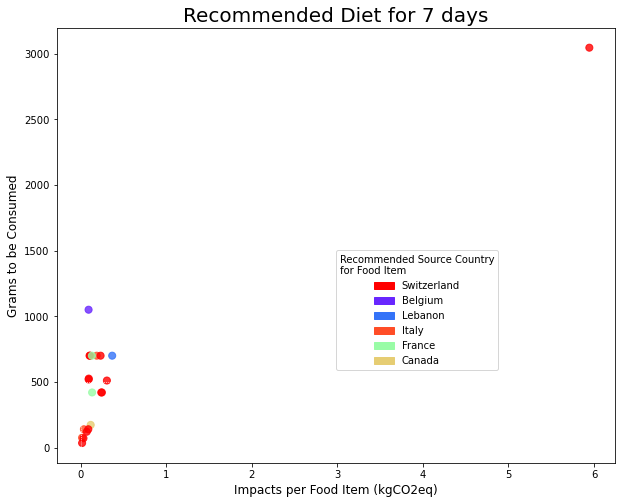

In [10]:
# HIDDEN
runcode5 = widgets.Button(description='Click Here to Build your Low Impact and Healthful Diet',\
                         layout=Layout(width='50%', height='50px'))
runcode5.style=button_wid.style
output5 = widgets.Output()
display(runcode5,output5)
runcode5.on_click(run_tool)